In [3]:
import astropy
from astropy.io import fits 
from astropy.stats import sigma_clip
from astropy.table import Table
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.visualization import time_support
import scipy.signal as sig
import scipy.optimize as op
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

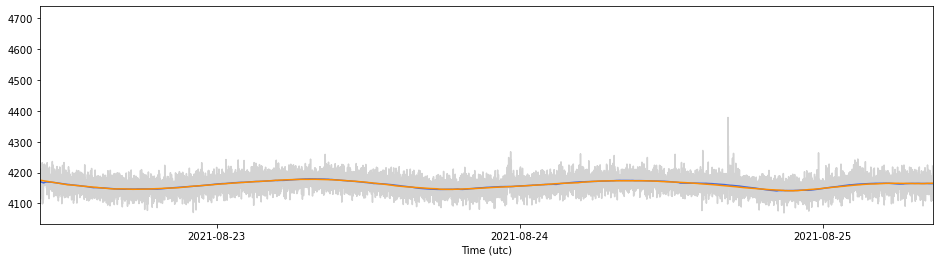

In [10]:
TESSDATA = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'

with fits.open(TESSDATA, mode="readonly") as hdulist:
    raw_time = hdulist[1].data['TIME']
    raw_flux = hdulist[1].data['PDCSAP_FLUX']
    raw_err = hdulist[1].data['PDCSAP_FLUX_ERR']
    
#Remove nan values, correct time values
    
data = np.vstack((raw_time, raw_flux, raw_err))
nonan_data = data[:, ~np.isnan(data).any(axis=0)]

times = nonan_data[0]
flux = nonan_data[1]
error = nonan_data[2]

t_corr = times+2457000
time = Time(t_corr, format = 'jd', scale = 'utc')
time.format = 'iso'

flux = np.array(flux)
err = np.array(error)

og_data = pd.DataFrame({
                        'Time': time,
                        ' Flux':flux
})

time_support()

plt.figure(figsize=(16,4))
plt.xlim([time[5270],time[18000]])# >>>>> small window for zooming in to fit curve

flux_smooth = sig.savgol_filter(flux, 1400, 3) #my opinion of the best parameters for this data

plt.plot(time,flux,color='lightgrey')
plt.plot(time,flux_smooth,color='royalblue')

ix = np.where(flux < (flux_smooth + (3*error))) #using 3 as the significance for the error for now

q_time = time[ix]
q_flux = sig.savgol_filter(flux[ix],2000,3)
quiescence = pd.DataFrame({
                        'Time': q_time,
                        'Quiescent Flux':q_flux
})
qIndex = np.where(quiescence['Time']) #ensure lists are same size for flare and quiescent data
err_list = err[qIndex]

clipped_data = pd.DataFrame({
                            'Time': time[qIndex],
                            ' Flux':flux[qIndex]
})
cliptime = time[qIndex]
clipflux = flux[qIndex]
flare_ranges = np.where(clipped_data[' Flux']>= (quiescence['Quiescent Flux']+(3*err_list)))
rangetimes = time[flare_ranges]
rangeflares = flux[flare_ranges]
plt.plot(q_time,q_flux, color='darkorange')


                          Time         Flux
0      2021-08-21 04:41:55.439  4178.156738
1      2021-08-21 04:42:15.439  4193.419922
2      2021-08-21 04:42:35.440  4184.613281
3      2021-08-21 04:42:55.441  4195.867188
4      2021-08-21 04:43:15.442  4174.927246
...                        ...          ...
66285  2021-09-13 04:45:15.326  4168.620605
66286  2021-09-13 04:45:35.326  4155.164551
66287  2021-09-13 04:45:55.326  4167.328125
66288  2021-09-13 04:46:15.326  4147.063477
66289  2021-09-13 04:46:35.326  4136.746582

[66290 rows x 2 columns]


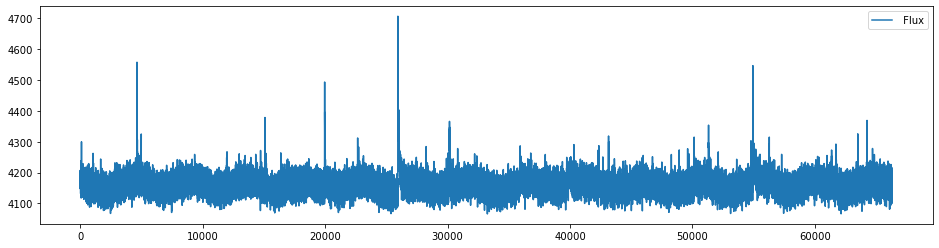

In [5]:
clipped_data.plot(figsize = (16,4))
print(clipped_data)

                          Time  Quiescent Flux
0      2021-08-21 04:41:55.439     4171.896585
1      2021-08-21 04:42:15.439     4171.884326
2      2021-08-21 04:42:35.440     4171.872062
3      2021-08-21 04:42:55.441     4171.859794
4      2021-08-21 04:43:15.442     4171.847522
...                        ...             ...
66285  2021-09-13 08:03:15.337     4153.435991
66286  2021-09-13 08:03:35.337     4153.436518
66287  2021-09-13 08:03:55.338     4153.437064
66288  2021-09-13 08:04:15.338     4153.437630
66289  2021-09-13 08:04:35.338     4153.438216

[66290 rows x 2 columns]


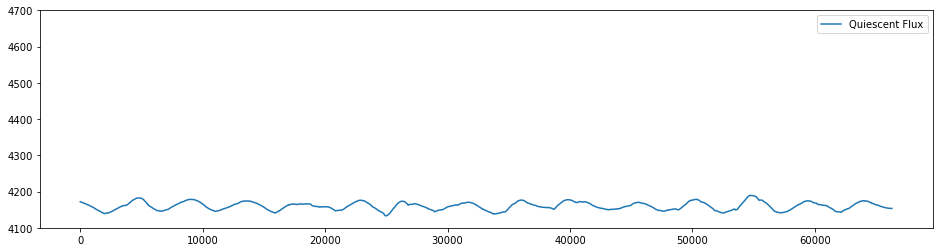

In [6]:
quiescence.plot(ylim=(4100,4700),figsize=(16,4))
print(quiescence)

In [15]:
#NEXT: find local max and min indices?
#peaks = where point > point before & after
#ends = where point < point before & after

(array([    2,     4,     6, ..., 66281, 66283, 66286]),)

In [43]:
peaks = 
ends = 


SyntaxError: invalid syntax (2067360548.py, line 1)